In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
import graphviz 
import pandas as pd
from pandas_profiling import ProfileReport


# Graficar inline
%matplotlib inline


In [161]:
estud =  pd.read_csv('./data/StudentsPerformance.csv', sep=',', engine='python')

In [162]:
from pandas_profiling import ProfileReport
prof = ProfileReport(estud)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [163]:
estud

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [164]:
estud = estud.rename(columns={'writing score':'writing_score','parental level of education':'parental_level_of_education','math score':'math_score',
                             'reading score':'reading_score','test preparation course':'test_preparation_course'})

In [165]:
estud.dtypes

gender                         object
race/ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [166]:
## PUNTO 1
## las variables gender, test preparation course, race/ethnicity y lunch son cualitatica nominal 
## la variable parental level of education es cualitativa odinal
## las notas son cuantitativas continuas 


In [167]:
mat=estud['math_score'].mean()
read=estud['reading_score'].mean()
wrt=estud['writing_score'].mean()

lista= estud


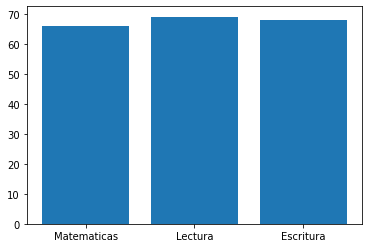

In [168]:
x_values = 'Matematicas','Lectura','Escritura'
y_values = mat ,read, wrt
plt.bar(x_values, y_values)
plt.show()
plt.close('all')


In [169]:
## PUNTO 2
##¿En qué asignatura en promedio los estudiantes obtuvieron un mejor puntaje? = Lectura. con un promedio de 69.169

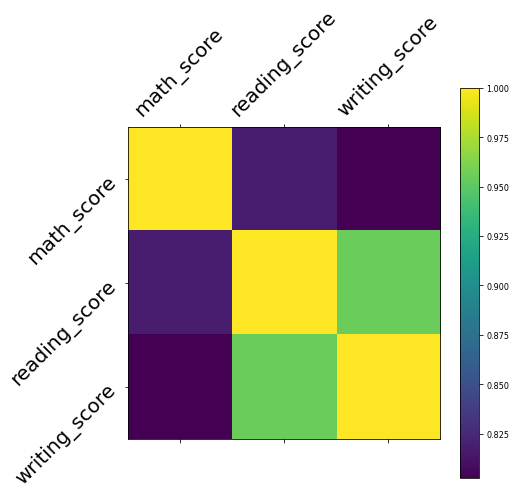

In [170]:

corr = estud.corr()


fig = plt.figure(figsize=(7, 7))
plt.matshow(corr, fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns,fontsize=20, rotation=45);
plt.yticks(range(len(corr.columns)), corr.columns,fontsize=20, rotation=45);
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.show()  

In [174]:
## PUNTO 3
##¿Existe alguna correlación entre los puntajes obtenidos en las tres asignaturas? 
##como se puede ver la correlacion entre writing score y reading score es considerablemente notable

In [175]:
lista = estud[['gender','math_score']]


In [181]:

listaM = lista[lista.gender == 'male']
listaF = lista[lista.gender == 'female']
prom=listaM['math_score'].mean()
print('El promedio de los estudiantes hombres en matematias es de: '+str(listaM['math_score'].mean()))



El promedio de los estudiantes hombres en matematias es de: 68.72821576763485


In [182]:
print('El promedio de los estudiantes mujeres en matematias es de: '+str(listaF['math_score'].mean()))

El promedio de los estudiantes mujeres en matematias es de: 63.633204633204635


In [183]:
## PUNTO 4
##¿Hay alguna diferencia observable en los puntajes de la asignatura de
##matemáticas entre hombres y mujeres? ¿Quiénes, hombres o mujeres, tienen la
##mediana más alta para esta misma asignatura? 
##Los hombres tienen un promedio de 68.72821576763485 considerablemente mayor al de las mujeres en matematicas 

In [184]:
nivel = estud[estud.writing_score > 90]
nivel['parental_level_of_education'].value_counts() 

associate's degree    19
some college          18
bachelor's degree     15
master's degree       10
some high school       5
high school            1
Name: parental_level_of_education, dtype: int64

In [186]:
## PUNTO 5
## ¿Qué nivel de escolaridad tienen los padres de los estudiantes que obtuvieron
##un puntaje superior a 90 en la asignatura de escritura? Liste los niveles de
##escolaridad del más al menos frecuente.


## El nivel con mayor frecuencia es 'associate's degree' 

In [187]:
estudPro = estud[estud.writing_score >= 90]
estudPro= estudPro[estudPro.reading_score >= 90]
estudPro= estudPro[estudPro.math_score >= 90]

In [188]:
estudProE=estudPro[estudPro.test_preparation_course == 'completed']

In [189]:
porEstudP = estudPro.shape[0]
porEstudP = (porEstudP /estud.shape[0]) * 100
porEstudP

2.8000000000000003

In [190]:
porEstudPE= estudProE.shape[0]
porEstudPE= (porEstudPE /estud.shape[0]) * 100
porEstudPE

1.7000000000000002

In [191]:
## PUNTO 6
##¿Qué porcentaje de los estudiantes obtuvieron puntajes iguales o superiores a
##90 en las tres asignaturas? ¿Qué porcentaje de los estudiantes obtuvieron
##puntajes iguales o superiores a 90 en las tres asignaturas y que adicionalmente
##estudiaron para los exámenes?

In [192]:
## PUNTO 6.1
print('el porcentaje de estudiantes que sacaron 90 en las 3 asignaturas es : '+str(porEstudP))

el porcentaje de estudiantes que sacaron 90 en las 3 asignaturas es : 2.8000000000000003


In [193]:
## PUNTO 6.2
print('el porcentaje de estudiantes que sacaron 90 en las 3 asignaturas y que estudiaron para los examenes fue de: '+str(porEstudPE))

el porcentaje de estudiantes que sacaron 90 en las 3 asignaturas y que estudiaron para los examenes fue de: 1.7000000000000002
